# Отчет по предмету "Численные методы решения дифференциальных уравнений" 6

Выполнил Свистельников Илья


## Задание
Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, t)$. Исследовать зависимость погрешности от сеточных параметров $h$ и $\tau$.

**Вариант 1**:

$\frac{\partial^2 U}{\partial t^2} = a^2 \frac{\partial^2 U}{\partial x^2}, a > 0$

$U(0,t) = -sin(at)$

$U(\pi,t) = sin(at)$

$U(x,0) = sin(x)$

$U_t(x,0) = -a cos(x)$

Аналитическое решение:

$U(x,t) = sin(x - at)$



## Решение

Для решения заданной задачи для гиперболического дифференциального уравнения воспользуемся явной схемой "крест" и неявной схемой. Так же выполним аппроксимацию второго начального условия с первым и со вторым порядком точности.


---

### **1. Построение сетки**

Разобьем область по $ x $ и $ t $ на сетку с шагами $ h $ и $ \tau $ соответственно:

- $ x_i = ih $, где $ i = 0, 1, ..., N $, $ h = \frac{\pi}{N} $
- $ t_n = n\tau $, где $ n = 0, 1, ..., M $

---

### **2. Явная схема "крест"**

**Дискретизация уравнения:**

Аппроксимируем производные конечными разностями:

$$
\frac{U_i^{n+1} - 2U_i^n + U_i^{n-1}}{\tau^2} = a^2 \frac{U_{i+1}^n - 2U_i^n + U_{i-1}^n}{h^2}
$$

**Явная формула для вычисления $ U_i^{n+1} $:**

$$
U_i^{n+1} = 2U_i^n - U_i^{n-1} + \tau^2 \left[a^2 \frac{U_{i+1}^n - 2U_i^n + U_{i-1}^n}{h^2} \right]
$$

---

### **3. Аппроксимация начального условия**

**С первым порядком:**

Используем первую разность по времени:

$$
\frac{U_i^1 - U_i^0}{\tau} = U_t(x_i, 0) = -a cos(x) \implies U_i^1 = \tau U_t(x_i, 0) + U_i^0 = -a cos(x_i) \tau + sin(x_i)
$$

**Со вторым порядком:**

Используем центральную разность и аппроксимируем вторую производную по времени с использованием уравнения:

$$
U_i^1 = U_i^0 + \tau \left( \frac{U_i^1 - U_i^0}{\tau} \right) + \frac{\tau^2}{2} \left(a^2 \frac{U_{i+1}^0 - 2U_i^0 + U_{i-1}^0}{h^2} \right)
$$

$$
U_i^1 = -a cos(x_i)\tau  + sin(x_i) + \frac{\tau^2}{2} \left(a^2 \frac{sin(x_{i+1}) - 2sin(x_i) + sin(x_{i - 1})}{h^2}\right)
$$

---

### **4. Неявная схема**

Для неявной схемы используем аналогичную дискретизацию, но производные берутся на новом временном слое $ n+1 $:

$$
\frac{U_i^{n+1} - 2U_i^n + U_i^{n-1}}{\tau^2} = a^2 \frac{U_{i+1}^{n+1} - 2U_i^{n+1} + U_{i-1}^{n+1}}{h^2}
$$

После упрощения получаем систему линейных уравнений относительно $ U_i^{n+1} $, которую можно решить методом прогонки:

$$
\left(\frac{2a^2}{h^2} + \frac{1}{\tau^2}\right)U_{i}^{n+1} - \frac{a^2}{h^2} U_{i+1}^{n+1} - \frac{a^2}{h^2} U_{i-1}^{n+1} = \frac{U_{i}^{n-1} - 2U_{i}^{n}}{\tau^2}
$$

Получим трехдиагональную систему:

\begin{equation*}
    \left(
        \begin{array}{cccc}
            1 & 0 & 0 & \ldots & 0 & 0\\
            \frac{a^2}{h^2} & \left(\frac{2a^2}{h^2} + \frac{1}{\tau^2}\right) & \frac{a^2}{h^2} & \ldots & 0 & 0\\
            0 &  \frac{a^2}{h^2} & \left(\frac{2a^2}{h^2} + \frac{1}{\tau^2}\right) & \frac{a^2}{h^2} & \ldots & \vdots\\
            \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
            \vdots & \vdots & \vdots & \frac{a^2}{h^2} & \left(\frac{2a^2}{h^2} + \frac{1}{\tau^2}\right) & \frac{a^2}{h^2}\\
            0 & 0 & 0 & \ldots & 0 & 1
        \end{array}
    \right)
    =
    \left(
        \begin{array}{c}
            -sin(at^{n+1}) \\
            \frac{U_{1}^{n-1} - 2U_{1}^{n}}{\tau^2} \\
            \vdots \\
            \vdots \\
            \frac{U_{N-1}^{n-1} - 2U_{N-1}^{n}}{\tau^2} \\
            sin(at^{n+1})
        \end{array}
    \right)
\end{equation*}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
# Параметры
L = np.pi # Длина отрезка
T = 0.5  # Время расчета
alpha = 0.25


Nx = 15
Nt = 160
orders = [1, 2, 3]

h = L / (Nx - 1)
tau = T / (Nt - 1)

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

r = tau / (h**2)
print(r)
h, tau

0.06244953457200694


(0.2243994752564138, 0.0031446540880503146)

In [ ]:
def tridiagonal_solver(a: np.ndarray, b: np.ndarray, c: np.ndarray, d: np.ndarray):
    """
    Функция решения СЛАУ с трехдиагональной матрицей
    с помощью метода прогонки

    Args:
        - a (np.ndarray): Нижняя диагональ
        - b (np.ndarray): Главная диагональ
        - c (np.ndarray): Верхняя диагональ
        - d (np.ndarray): Вектор правых частей

    Returns:
        - np.ndarray: Возвращает вектор X, решение СЛАУ
    """
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    x = np.zeros(n)

    # Прямой ход
    alpha[0] = b[0]
    beta[0] = d[0] / alpha[0]

    for i in range(1, n):
        alpha[i] = b[i] - a[i-1] * c[i-1] / alpha[i-1]
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / alpha[i]

    # Обратный ход
    x[-1] = beta[-1]
    for i in range(n-2, -1, -1):
        x[i] = beta[i] - c[i] * x[i+1] / alpha[i]

    return x

In [ ]:
def explicit_scheme(u, u_old, r, h, tau, n, order):
    u_new = np.zeros_like(u)
    u_new[1:-1] = 2*u[1:-1] - u_old[1:-1] + tau**2 * (alpha**2 * (u[2:] - 2*u[1:-1] + u[:-2])/(h**2))
    u_new[0] = -np.sin(alpha * t[n])
    u_new[-1] = np.sin(alpha * t[n])
    return u, u_new


In [ ]:
def implicit_scheme(u, u_old, r, h, tau, n, order):
    u_new = np.zeros_like(u)
    a = (alpha**2/h**2)* np.ones(Nx-1)
    b = (-2 * alpha**2/h**2 - 1/tau**2) * np.ones(Nx)
    c = (alpha**2/h**2)* np.ones(Nx-1)
    d = u_old/tau**2 - 2*u/tau**2

    d[0] = -np.sin(alpha* t[n])
    b[0] = 1
    c[0] = 0

    a[-1] = 0
    b[-1] = 1
    d[-1] = np.sin(alpha * t[n])
    u_new = tridiagonal_solver(a, b, c, d)

    return u, u_new


In [ ]:
def analytical_solution(x, t):
    return np.sin(x - alpha * t)

def calculate_error(u_numerical, u_analytical):
    return np.max(np.abs(u_numerical - u_analytical))

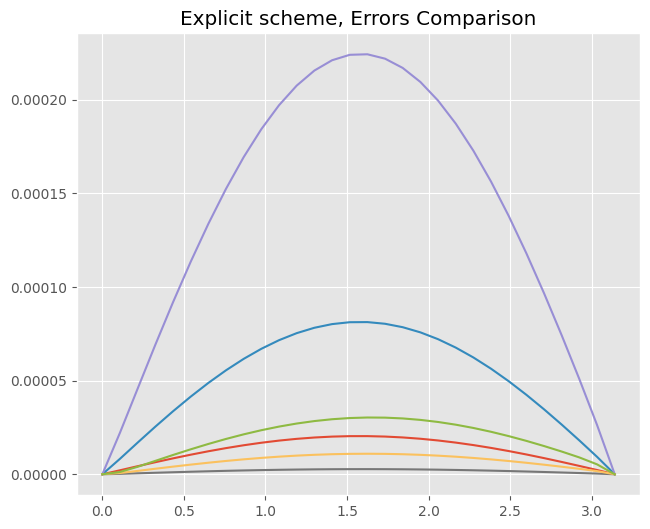

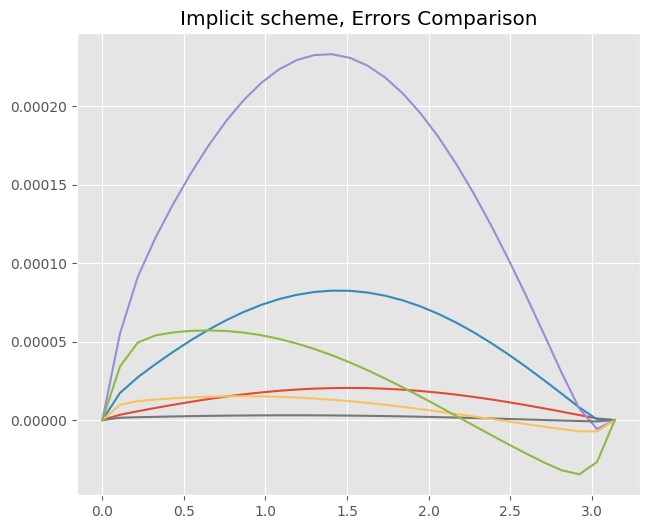

In [ ]:
schemes = ['Explicit', 'Implicit']
orders = [1, 2]
L = np.pi  # Длина отрезка
Nx = 30
Nt = 160
h = L / (Nx - 1)
x = np.linspace(0, L, Nx)

# Сохраним данные для отрисовки всех T в одном графике
T_values = [0.3, 0.6, 1]
for scheme in schemes:
    plt.figure(figsize=(16, 6))  # создаем фигуру для каждой схемы

    for order in orders:
        for T in T_values:
            tau = T / (Nt - 1)
            t = np.linspace(0, T, Nt)

            u_analytical = analytical_solution(x, T)
            u_old = np.sin(x)
            u = np.zeros_like(x)
            if order == 1:
                u = -alpha * np.cos(x) * tau + np.sin(x)
            elif order == 2:
                u[1:-1] = u_old[1:-1] - alpha * np.cos(x[1:-1]) * tau + tau**2 * (alpha**2 * (u_old[2:] - 2*u_old[1:-1] + u_old[:-2]) / (h**2)) / 2
                u[0] = -np.sin(alpha * t[1])
                u[-1] = np.sin(alpha * t[1])

            u_history = [u_old.copy(), u.copy()]
            u_error_in_time = []
            u_error_in_time.append(calculate_error(u_old, analytical_solution(x, 0)))
            u_error_in_time.append(calculate_error(u, analytical_solution(x, t[1])))

            for n in range(2, Nt):
                if scheme == 'Explicit':
                    u_old, u = explicit_scheme(u, u_old, r, h, tau, n, order)
                elif scheme == 'Implicit':
                    u_old, u = implicit_scheme(u, u_old, r, h, tau, n, order)

                u_error_in_time.append(calculate_error(u, analytical_solution(x, t[n])))
                u_history.append(u.copy())

            # Визуализация результатов для текущего T
            #plt.subplot(121)
            #plt.plot(x, u, label=f'Numerical {scheme} order={order}, T={T}')

            # Визуализация ошибки для текущего T
            plt.subplot(122)
            plt.plot(x, u - u_analytical, label=f'Error at T={T}, order={order}')

        # Отображаем аналитическое решение для всех T
        #plt.subplot(121)
        #plt.plot(x, u_analytical, '--', label='Analytical')
        #plt.title(f'{scheme} scheme, Comparison of T values')
        #plt.xlabel('x')
        #plt.ylabel('U(x,T)')
        #plt.legend()

        # plt.subplot(122)
        plt.title(f'{scheme} scheme, Errors Comparison')
        # plt.xlabel('x')
        # plt.ylabel('Error')
        # plt.legend()

    #plt.tight_layout()
    plt.show()


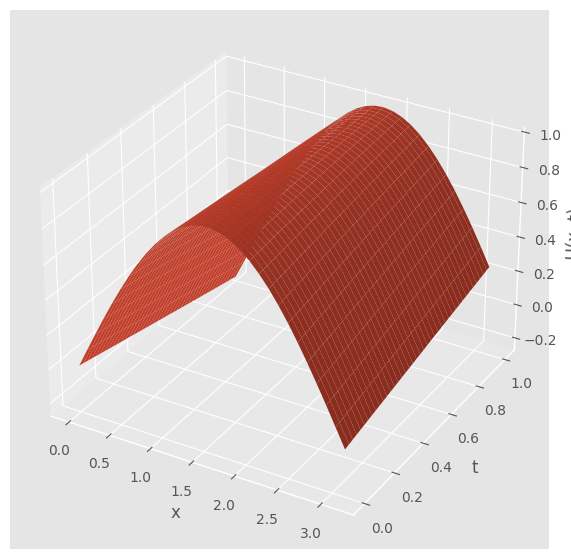

In [ ]:

T = 0.1  # Увеличиваем диапазон времени

scheme = 'Явная'
order = 1

u_old = np.sin(x)
u = np.zeros_like(x)

# Начальные условия для первого порядка
u = -alpha * np.cos(x) * tau + np.sin(x)

u_all = [u_old.copy(), u.copy()]

for n in range(2, Nt):
    u_old, u = explicit_scheme(u, u_old, r, h, tau, n, order)
    u_all.append(u.copy())

u_all = np.array(u_all)

# Построение 3D графика
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, T, u_all)  # Изменен colormap
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U(x, t)')
#ax.set_title(f'3D график: {scheme} схема')
#ax.view_init(0, 90)

plt.show()